
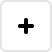
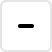
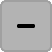
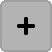
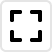
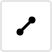
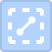

In [1]:
import numpy as np
import pandas as pd

from lets_plot import *

LetsPlot.setup_html() 

In [2]:
# Load MPG dataset
mpg = pd.read_csv ("https://jetbrains.bintray.com/lets-plot/mpg.csv")

In [3]:
# Default tooltips: color='cty' and shape='drv'
p1 = ggplot(mpg, aes(x='displ', y='hwy')) + geom_point(aes(color='cty', shape='drv'), size=5)
p1

In [4]:
# Set tooltip list: static text, list of variables, aes 'color'
p1 = ggplot(mpg, aes(x='displ', y='hwy')) \
   + geom_point(aes(color='cty', shape='drv'), size=5, \
                tooltips=layer_tooltips([tooltip_line('text@-- [mpg dataset] --'), \
                                         tooltip_line(['manufacturer','model','year'], format='{} {} ({})'), \
                                         'class', \
                                         tooltip_line('aes@color', format='{.1f} (miles per gallon)') ]))
p1

In [5]:
# Set empty tooltip aes list: no tooltips
p1 = ggplot(mpg, aes(x='displ', y='hwy')) \
   + geom_point(aes(color='cty', shape='drv'), size=5, tooltips=layer_tooltips(lines=[]))
p1

In [6]:
# Example with calculated variable 
data = {
    'country': ['country A', 'country B', 'country C'],
    'cases': [153200, 1360, 51],
    'd': [243, 32, 0],
    'x': [1, 2, 3],
    'y': [1, 1, 1],
}

df = pd.DataFrame(data)
df['cases_log'] = np.log(df.cases + 1)

# data values are too different - use log as aes and add original value to the tooltip
p = ggplot(df, aes(x='x', y='y')) + \
    theme(legend_position='none', axis_title='blank', axis_text='blank', axis_ticks='blank', axis_tooltip='blank') + \
    geom_point(aes(fill='cases_log', color='country'), data=df, size=4, \
                     tooltips=layer_tooltips([tooltip_line(['cases_log','cases'], format='cases_log = {.1f}  ({})'),\
                                              tooltip_line('d', label='number of d'),\
                                              'country']))
p